# Test with VGG16 no train

In [1]:
from keras.applications import vgg16
import numpy as np
import tensorflow as tf
import os
import cv2
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

In [2]:
#Set random seed
np.random.seed(1234)
tf.random.set_seed(5678)

In [3]:
!git clone https://github.com/Napasakon/DADS7202_CNN_Image_Classifier.git
!unzip -o /content/DADS7202_CNN_Image_Classifier/dataset.zip -d /content/DADS7202_CNN_Image_Classifier/

Cloning into 'DADS7202_CNN_Image_Classifier'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 68 (delta 9), reused 0 (delta 0), pack-reused 41
Receiving objects: 100% (68/68), 68.60 MiB | 20.10 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Archive:  /content/DADS7202_CNN_Image_Classifier/dataset.zip
   creating: /content/DADS7202_CNN_Image_Classifier/handball/
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/01.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/02.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/03.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/04.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/05.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/06.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/07.jpg  
  inflating: /content/DADS7202_CNN_Image

In [4]:
def generate_npy_dataset(srcPath, desPath, imgSize=(224,224), outName='out', classNo=1):
  arr = os.listdir(srcPath)
  x = []
  y = []

  for filename in arr:
      file_destination = srcPath + filename

      img = cv2.imread(file_destination)
      RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #CAUTION! SAVED IN RGB NOT BGR
      img = cv2.resize(RGB_img, imgSize)
      x.append(img)
      y.append(classNo)
  # print(f'x shape: {np.array(x).shape}')
  # print(f'y shape: {np.array(y).shape}')
  np.save(desPath + 'x_' + outName, x)
  np.save(desPath + 'y_' + outName, y)

In [5]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/sepak trakaw/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(224,224),
                     outName='sepak_trakaw',
                     classNo=0)

In [6]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/kendo/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(224,224),
                     outName='kendo',
                     classNo=1)

In [7]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/handball/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(224,224),
                     outName='handball',
                     classNo=2)

In [8]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/fencing/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(224,224),
                     outName='Fencing',
                     classNo=3)

In [9]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/baseball/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(224,224),
                     outName='Baseball',
                     classNo=4)

In [10]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/high jump/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(224,224),
                     outName='High_Jump',
                     classNo=5)

In [11]:
x0 = np.load('/content/DADS7202_CNN_Image_Classifier/x_sepak_trakaw.npy')
x1 = np.load('/content/DADS7202_CNN_Image_Classifier/x_kendo.npy')
x2 = np.load('/content/DADS7202_CNN_Image_Classifier/x_handball.npy')
x3 = np.load('/content/DADS7202_CNN_Image_Classifier/x_Fencing.npy')
x4 = np.load('/content/DADS7202_CNN_Image_Classifier/x_Baseball.npy')
x5 = np.load('/content/DADS7202_CNN_Image_Classifier/x_High_Jump.npy')

print(x0.shape)
print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)
print(x5.shape)

(125, 224, 224, 3)
(140, 224, 224, 3)
(130, 224, 224, 3)
(135, 224, 224, 3)
(174, 224, 224, 3)
(158, 224, 224, 3)


In [12]:
y0 = np.load('/content/DADS7202_CNN_Image_Classifier/y_sepak_trakaw.npy')
y1 = np.load('/content/DADS7202_CNN_Image_Classifier/y_kendo.npy')
y2 = np.load('/content/DADS7202_CNN_Image_Classifier/y_handball.npy')
y3 = np.load('/content/DADS7202_CNN_Image_Classifier/y_Fencing.npy')
y4 = np.load('/content/DADS7202_CNN_Image_Classifier/y_Baseball.npy')
y5 = np.load('/content/DADS7202_CNN_Image_Classifier/y_High_Jump.npy')

print(y0.shape)
print(y1.shape)
print(y2.shape)
print(y3.shape)
print(y4.shape)
print(y5.shape)

(125,)
(140,)
(130,)
(135,)
(174,)
(158,)


In [13]:
x = np.concatenate((x0, x1, x2, x3, x4, x5))
y = np.concatenate((y0, y1, y2, y3, y4, y5))
print(x.shape)
print(y.shape)

(862, 224, 224, 3)
(862,)


In [14]:
#Train Test Split
from sklearn.model_selection import train_test_split

test_size = 0.3
x_train, x_test = train_test_split(x, test_size = test_size, random_state = 3)
y_train, y_test = train_test_split(y, test_size = test_size, random_state = 3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(603, 224, 224, 3)
(603,)
(259, 224, 224, 3)
(259,)


In [15]:
from keras.applications import vgg16

In [16]:
#Save vgg16 model in model variable
modelNoTrain = vgg16.VGG16()

553467096/553467096 [==============================] - 9s 0us/step


In [17]:
#Pre-processing
x_train_vgg16 = preprocess_input(x_train)
x_test_vgg16 = preprocess_input(x_test)

print(x_train_vgg16.shape)
print(x_test_vgg16.shape)

(603, 224, 224, 3)
(259, 224, 224, 3)


35363/35363 [==============================] - 0s 0us/step


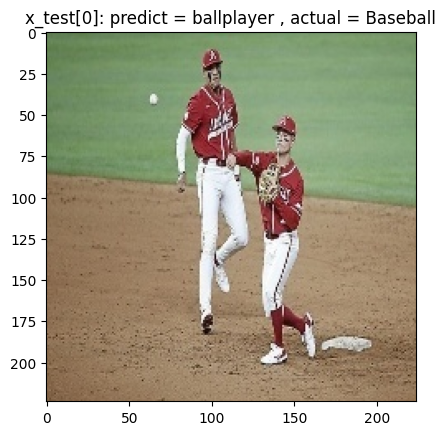

1/1 [==============================] - 1s 611ms/step


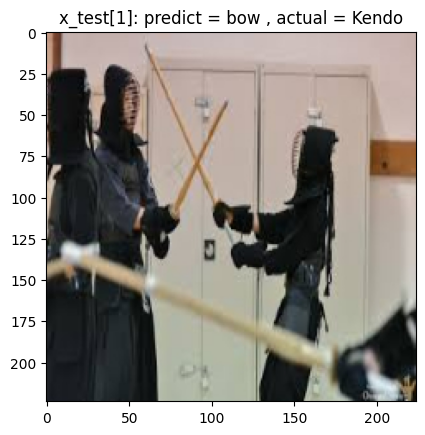

1/1 [==============================] - 1s 596ms/step


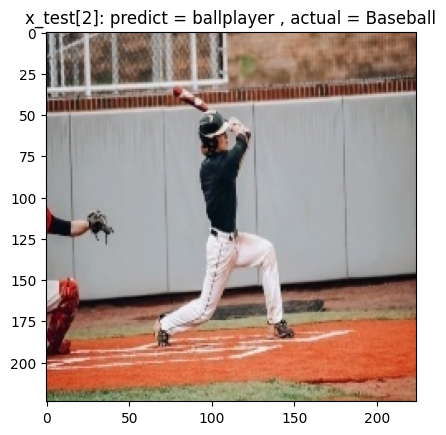

1/1 [==============================] - 1s 591ms/step


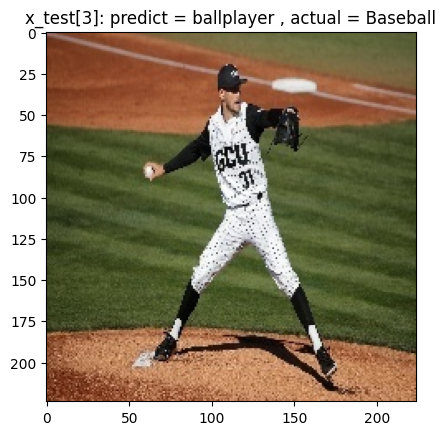

1/1 [==============================] - 1s 819ms/step


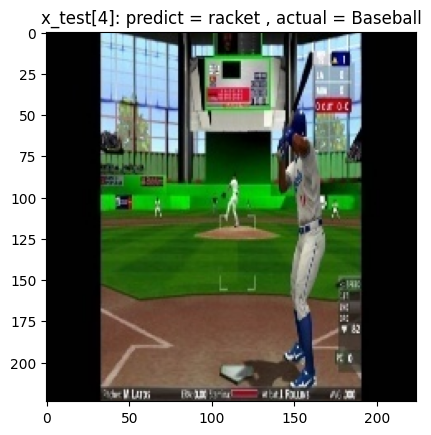

In [18]:
#Predict the inputs on the model
label = ['Sepak Trakaw','Kendo','Handball','Fencing','Baseball','High Jump']
for i in range(5):
  x_input = x_test_vgg16[i][np.newaxis, ...]
  predict_img = modelNoTrain.predict(x_input)
  #Let's predict top 5 results
  top_five_predict = vgg16.decode_predictions(predict_img, top=1)
  top_five_predict
  plt.imshow(x_test[i])
  plt.title('Predict: ' + str(top_five_predict))
  plt.title(f'x_test[{i}]: predict = {top_five_predict[0][0][1]} , actual = {label[int(y_test[i])]}')
  plt.show()